In [249]:
%matplotlib inline

In [4]:
import properties as prop
import matplotlib.pyplot as plt
import matplotlib
from results_reader import read_results
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

INIT_SIZE = 20
ACQ_SIZE = 10


def plot(paths, strategies, limits=(0,1), convolve=False, mylabels=None, myloc='lower right'):
    font = {'family': 'normal',
            'size': 21}
    matplotlib.rc('font', **font)
    current_palette = sns.color_palette()

    sns.set_style('whitegrid')
    figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylim(limits[0], limits[1])
    plt.xlim(0, 1000)
    linewidth = 3
    markersize = 7

    results = read_results(results_file=paths[0])
    for i in range(1, len(paths)):
        results.update(read_results(results_file=paths[i]))
    if len(strategies) == 0:
        strategies = list(results.keys())
    if mylabels == None:
        mylabels = strategies
    plot_policy_by_episode = False

    if plot_policy_by_episode:
        strategies = []
        labels = []
        keys = []
        for i in range(0, prop.NUM_EPISODES):
            strategies.append("policy_{}".format(str(i)))
            labels.append("policy_{}".format(str(i)))
            keys.append(i)
    else:
        labels = mylabels
        keys = range(len(strategies))

    with_stddev = True
    if convolve:
        with_stddev = False
    width = 10
    for i in keys:
        means = np.array(results[strategies[i]][0])
        # Convolve output (moving average)
        if convolve:
            means = np.convolve(means, np.ones(width), 'valid') / width
        std = np.array(results[strategies[i]][1])
        x = [x * ACQ_SIZE + INIT_SIZE for x in range(len(means))]
        if labels[i].endswith('ALIL'):
            color = 'cyan'
            plt.plot(x, means, marker='.', label=labels[i], linewidth=linewidth, markersize=markersize,
                     color=color)
            if with_stddev:
                plt.fill_between(x, means + std, means - std, alpha=0.1)
        elif labels[i].endswith('andom'):
            color = 'black'
            plt.plot(x, means, marker='.', label=labels[i], linestyle='--', linewidth=5, markersize=markersize,
                     color=color)
            if with_stddev:
                plt.fill_between(x, means + std, means - std, alpha=0.1, color=color)
        else:
            plt.plot(x, means, marker='.', label=labels[i], linewidth=linewidth, markersize=markersize)
            if with_stddev:
                plt.fill_between(x, means + std, means - std, alpha=0.1)
    plt.legend(loc='lower right', ncol=3, prop={'size': 20})
    plt.ylabel("Test data accuracy score")
    plt.xlabel("Labeling effort")
    #plt.savefig(path + '.pdf', format="pdf", dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, transparent=False, bbox_inches='tight', pad_inches=0.0, frameon=None, metadata=None)
    plt.show()


Results for active learning for 1000 samples (acq. 10) on the MNIST dataset. Classifier is the CNN.
IALE policy was trained using Resnet-18 classifier on MNIST. These experiments are of the transfer type.

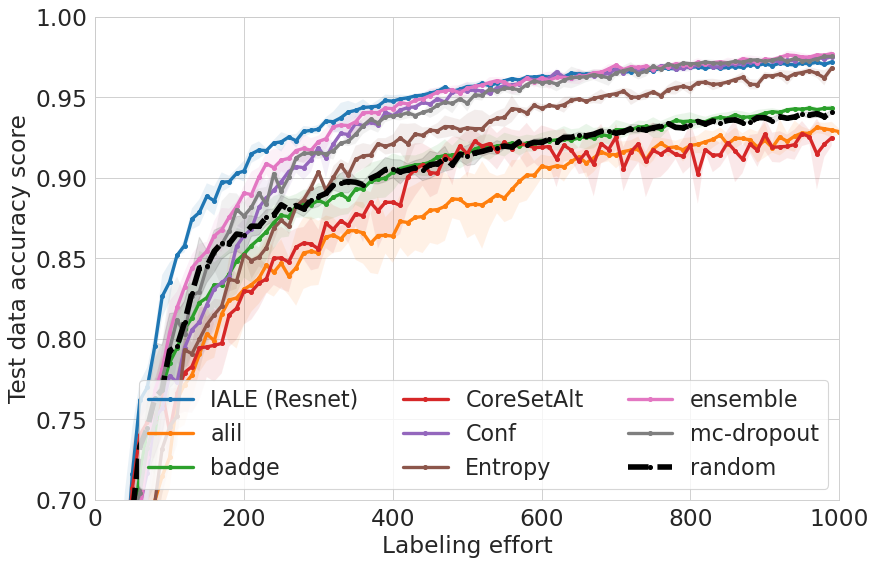

In [5]:
paths = [
           "./results/cnn_from_resnet.json",
            "./results/alil.json",
            "./results/baselines.json",
            "./results/random.json",
        ]

plot(paths, strategies=[], limits=(0.7, 1.0), convolve=False, mylabels=None)